# NFCS DATA in United States


## Introduction and Background

## Data Description


In this research I will use an open source dataset 'The National Financial Capability Study' (NFCS) provided by FINRA. This dataset is a primary data collected from the US citizens with an interval of three years. The first round of survey was conducted in the year of 2009 following the Global financial turmoil. Later on, second round was conducted in 2012, third in 2015 and most recent survey was conducted in 2018. More detail of the dataset can be found [here](https://www.usfinancialcapability.org/) and can be downloaded [here](https://www.usfinancialcapability.org/downloads.php). This dataset includes a wide range of financial, demographic and professional indicators of American Citizens from all the regions and states. Since dataset includes regional information, I will use Foursquare API to access Foursquare location data for US to compare the US states based on credit card behavior. I will combine the NFCS dataset with the US location data in order to explore the areas and states with good credit records and bad credit records. This result of this analysis might be useful for banks and other financial institutions as well as for Government to devise credit policy in the different regions based on the credit card behavior of the population.


In [1]:
##Importing libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
path ='/Users/rizwanmushtaq/Desktop/Data_Science/Python_Tutorial/NFCS2018_09_19.csv'


In [3]:
df1 = pd.read_csv(path, dtype= 'unicode', decimal=',')


In [4]:
df1.head()

,TRACK,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,...,M21_4,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018,2018010001,48,9,4,2,5,11,1,5,...,,1,3,98,98,98,1,0.68368306,0.51964208,1.09518877
1,2018,2018010002,10,5,3,2,2,8,1,6,...,,1,3,98,3,1,98,0.80835753,2.51684077,0.92269329
2,2018,2018010003,44,7,3,2,2,8,1,6,...,,1,1,98,98,1,98,1.02155141,1.89619186,0.67109295
3,2018,2018010004,10,5,3,2,1,7,1,6,...,,98,98,4,4,2,98,0.80835753,2.51684077,0.92269329
4,2018,2018010005,13,8,4,1,2,2,1,6,...,,1,3,98,2,1,98,0.4480747,0.61473322,1.23222123


In [5]:
df1['J32'].value_counts()

      53655
5     24438
4      9890
3      8837
2      6311
98     2611
1      2197
99      371
Name: J32, dtype: int64

In [6]:
#Renaming required columns
df2 = df1.rename(columns={'A3':'gender','A3Ar_w':'agegrp', "A3B":"agegen",'A4A_new_w': "ethn", 'A5_2015':'edu' , 'A6':'marital' ,  'A7':'living',
     'A7A':'maritalvar',  'A8':'hhincome' ,  'AM21':'armservice',  'AM30':'service',  'AM31':'retired' ,
    'AM22':'spousearm', 'A9':'prof' ,  'A10':'profspouse', 'A21_2015':'ptimestudent',
     'A22_2015':'currentstudent',  'M6':'interest', 'M7':'inflation',  'M8':'bond',  'M31':'cinterest', 'M9':'mortgage', 'M10':'risk',
     'J1':'finsatisfacton',  'J2':'willingrisk', 'J3':'spendingincome',  'J5':'savingunforseen',  'J6':'savingchildedu',
     'J32':'creditrecord', 'B1':'fininc1',  'B2':'fininc2',  'B4':'fininc3',  'B14':'invest',  'E7':'homemort',  'E15_2015':'mortpayment',
    'F2_1':'creditcardpayment', 'F2_3':'minpayment', 'F2_4':'latefee' ,'F2_5': 'limitfee' , 'G20':'unpaidbil' ,
    'G25_2':'paydayloan' , 'G23':'toomuchdebt','M20': 'fineducschool' ,
     'M21_1':'fineduchschool' ,  'M21_2_2015':'fineduccollege' ,  'M21_3':'fineducepmloyer' , 
    'M1_1':'finconfdaytoday' , 'M1_2':'finconf_math' ,  'A14':'mostknowledge' ,  'J20':'howconfident', 'STATEQ':'usstate' ,  'CENSUSDIV':'censusdiv' , 'CENSUSREG':'censusreg' }, errors="raise")


In [7]:
#Renaming required columns
df3 = df2[['gender','agegrp', 'ethn', 'edu', 'marital', 'hhincome', 'armservice',  'service',  'retired',
    'spousearm', 'prof', 'profspouse','ptimestudent','currentstudent',  
     'finsatisfacton',  'willingrisk', 'spendingincome', 'savingunforseen', 'savingchildedu',
     'creditrecord', 'fininc1',  'fininc2',  'fininc3',  'invest',  'homemort',  'mortpayment',
    'creditcardpayment', 'minpayment', 'latefee', 'limitfee', 'unpaidbil',
    'paydayloan', 'toomuchdebt', 'fineducschool','fineduchschool',  'fineduccollege',  'fineducepmloyer', 
    'finconfdaytoday', 'finconf_math',  'mostknowledge',  'howconfident', 'usstate',  'censusdiv', 'censusreg',
    'interest', 'inflation', 'bond', 'cinterest', 'mortgage', 'risk']]

In [8]:
df3 = df3.replace('99', np.nan)
df3 = df3.replace('98', np.nan)

In [9]:
df3.head()
df3.shape

(108310, 50)

In [10]:
df3.isnull()

,gender,agegrp,ethn,edu,marital,hhincome,armservice,service,retired,spousearm,...,howconfident,usstate,censusdiv,censusreg,interest,inflation,bond,cinterest,mortgage,risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,True
108306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
108307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [11]:
rows_before = df3.shape[0]
df3 = df3.dropna()
rows_after = df3.shape[0]

In [12]:
rows_before - rows_after


72354

In [13]:
df3['inter'] = df3['interest'].replace(['2', '3'], '0')
df3['infl'] = df3['inflation'].replace(['1', '2'], '0')
df3['infl'] = df3['infl'].replace(['3'], '1')
df3['bnd'] = df3['bond'].replace(['1', '3', '4'], '0')
df3['bnd'] = df3['bnd'].replace(['2'], '1')
df3['mort'] = df3['mortgage'].replace(['2'], '0')
df3['mort'] = df3['mort'].replace(['2'], '1')
df3['cinter'] = df3['cinterest'].replace(['1', '3', '4', ' '], '0')
df3['cinter'] = df3['cinter'].replace(['2'], '1')
df3['rsk'] = df3['risk'].replace(['1'], '0')
df3['rsk'] = df3['rsk'].replace(['2'], '1')

In [14]:
df3['rsk'] = pd.to_numeric(df3['rsk'])
df3['inter'] = pd.to_numeric(df3['inter'])
df3['infl'] = pd.to_numeric(df3['infl'])
df3['cinter'] = pd.to_numeric(df3['cinter'])
df3['bnd'] = pd.to_numeric(df3['bnd'])
df3['mort'] = pd.to_numeric(df3['mort'])

In [15]:
fl  = df3['rsk'] + df3['mort'] + df3['cinter'] + df3['bnd'] + df3['infl'] + df3['inter']
df3['fl'] = fl

In [16]:
df3['credit'] = pd.to_numeric(df3['creditrecord'], errors='coerce').fillna(0).astype(int)

In [17]:
df3['credit'].mean()

1.9478807431304928

In [18]:
df3['credit_bin'] = df3['credit'].apply(lambda x: 1 if x >= 2 else 0)

In [19]:
df3['credit_bin'].value_counts()

0    19946
1    16010
Name: credit_bin, dtype: int64

In [20]:
#df3['censusreg'] = pd.to_numeric(df3['censusreg'], errors='coerce')
df3['gender'] = pd.to_numeric(df3['gender'])
df3['agegrp'] = pd.to_numeric(df3['agegrp'])
df3['ethn'] = pd.to_numeric(df3['ethn'])
df3['edu'] = pd.to_numeric(df3['edu'], errors='coerce').fillna(0).astype(int)
df3['marital'] = pd.to_numeric(df3['marital'])
df3['hhincome'] = pd.to_numeric(df3['hhincome'])
df3['armservice'] = pd.to_numeric(df3['armservice'], errors='coerce').fillna(0).astype(int)
df3['retired'] = pd.to_numeric(df3['retired'], errors='coerce').fillna(0).astype(int)
df3['prof'] = pd.to_numeric(df3['prof'])
df3['profspouse'] = pd.to_numeric(df3['profspouse'], errors='coerce').fillna(0).astype(int)
df3['currentstudent'] = pd.to_numeric(df3['currentstudent'], errors='coerce').fillna(0).astype(int)
df3['finsatisfacton'] = pd.to_numeric(df3['finsatisfacton'])
df3['willingrisk'] = pd.to_numeric(df3['willingrisk'])
df3['savingchildedu'] = pd.to_numeric(df3['savingchildedu'], errors='coerce').fillna(0).astype(int)
df3['finconfdaytoday'] = pd.to_numeric(df3['finconfdaytoday'])
df3['usstate'] = pd.to_numeric(df3['usstate'])
df3['censusdiv'] = pd.to_numeric(df3['censusdiv'])
df3['censusreg'] = pd.to_numeric(df3['censusreg'])

In [21]:
Features = df3[['gender','agegrp','ethn', 'edu', 'marital', 'hhincome', 'armservice', 'retired','prof',
               'profspouse','currentstudent', 'finsatisfacton', 'willingrisk', 'savingchildedu','finconfdaytoday','fl', 'usstate','censusdiv','censusreg']]

In [22]:
X = StandardScaler().fit(Features).transform(Features)
X

array([[ 1.24002122, -1.93622569, -0.54426605, ..., -0.00968403,
        -0.45492667, -0.64656976],
       [-0.80643781, -1.28873421, -0.54426605, ..., -0.34800403,
        -0.06360267,  0.30016677],
       [ 1.24002122,  1.30123169, -0.54426605, ..., -1.09230803,
        -0.06360267,  0.30016677],
       ...,
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629],
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629],
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629]])

In [23]:
y = df3['credit_bin'].values


In [24]:
import statsmodels.api as sm
logit_model=sm.Logit(y,Features)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.093322
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.864    
Dependent Variable: y                AIC:              6748.9765
Date:               2020-12-31 12:26 BIC:              6910.2875
No. Observations:   35956            Log-Likelihood:   -3355.5  
Df Model:           18               LL-Null:          -24707.  
Df Residuals:       35937            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
gender          -0.3688   0.0695  -5.3092 0.0000 -0.5050 -0.2327
agegrp          -0.0658   0.0295  -2.2264 0.0260 -0.1236 -0.0079
ethn         

In [25]:
y1 = df3['credit'].values
model = sm.OLS(y1, X)


In [26]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.471
Model:                            OLS   Adj. R-squared (uncentered):              0.470
Method:                 Least Squares   F-statistic:                              1681.
Date:                Thu, 31 Dec 2020   Prob (F-statistic):                        0.00
Time:                        12:26:22   Log-Likelihood:                         -78783.
No. Observations:               35956   AIC:                                  1.576e+05
Df Residuals:                   35937   BIC:                                  1.578e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
##Doint Neural Network Analysis to predict credit card behavior

In [28]:
# Import Scikit-Learn model
from sklearn.neural_network import MLPClassifier

In [29]:
#Setup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [30]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop


In [31]:
# Specify an activation function
mlp = MLPClassifier(hidden_layer_sizes=(5,2), activation= 'logistic')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [33]:
# Fit and predict data (similar to approach for other sklearn models)
mlp.fit(X_train, y_train)
mlp.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [34]:
np.mean(y), np.mean(1-y)

(0.44526643675603517, 0.5547335632439648)

In [35]:
### BEGIN SOLUTION
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.988
roc-auc is 0.997


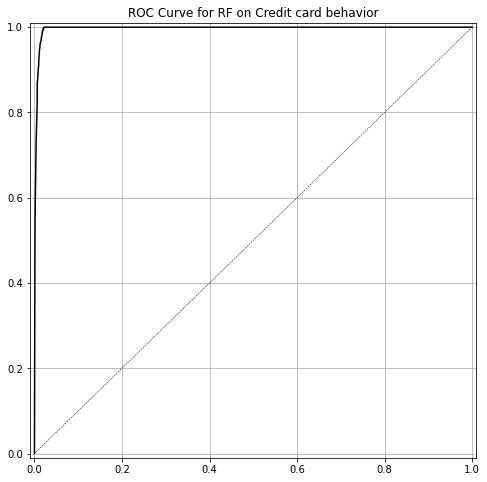

In [37]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on Credit card behavior'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')
### END SOLUTION

In [38]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [39]:
# Define the Model 
# Input size is 8-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

#y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
#y_pred_prob_nn_1 = model_1.predict(X_test_norm)

In [ ]:
#Visualisng the linear regression model results
#plt.scatter(X,y1,color='red')
#lt.plot(X,lin_reg.predict(X),color='blue')
#plt.title('Truth or bluff(Linear Regression)')
#plt.xlabel('Position Level')
#plt.ylabel('Salary')
#plt.show()

In [2]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    
    article_names = df[df["article_id"].isin(article_ids)]["title"].unique().tolist() 

    return article_names # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    article_ids = list((user_item.iloc[user_id-1][user_item.iloc[user_id-1]==1].index).astype(str))
    article_names = get_article_names(article_ids)
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    recs = []
    similar_user_id = find_similar_users(user_id)
    for user_id in similar_user_id:
        article_ids, article_names = get_user_articles(user_id)
        recs = list(set().union(recs, article_ids)) 
        if len(recs) >= 10:
                break
        
    return recs # return your recommendations for this user_id   

NameError: name 'df' is not defined

In [3]:
age_check = lambda x: 'Welcome to the site!' \
    if age > 13 \
    else 'Sorry you are too young to enter this site.'